In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("rendimientobuscador.csv")

### Tiempo medio buscador

MEDIA: 9611.323666666665 ms
DESVIACION TIPICA: 294.49048780619887 ms


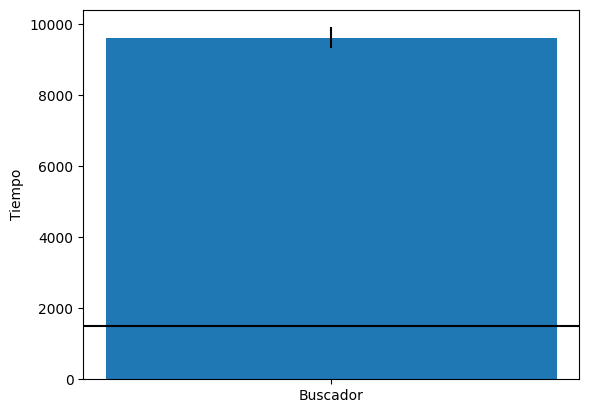

In [3]:
from cProfile import label


urls = df.groupby("URL").sum()

print("MEDIA: " + str(urls.mean()["TIME"]) + " ms")
print("DESVIACION TIPICA: " + str(urls.std()["TIME"]) + " ms")

plt.bar("Buscador", urls.mean()["TIME"], yerr=urls.std()["TIME"])
plt.axhline(y=1500, color='black', linestyle='-')
plt.ylabel("Tiempo")
plt.show()

### Tiempo Medio por Grupo

                                  TIME
GRUPO                                 
len_grupos_time               8886.430
limitar_busqueda_grupos_time   192.968
not_articulos_count_time       105.895
seteo_cache_time               382.409
                                    TIME
GRUPO                                   
len_grupos_time               309.407225
limitar_busqueda_grupos_time    5.302992
not_articulos_count_time        2.922038
seteo_cache_time               43.760860


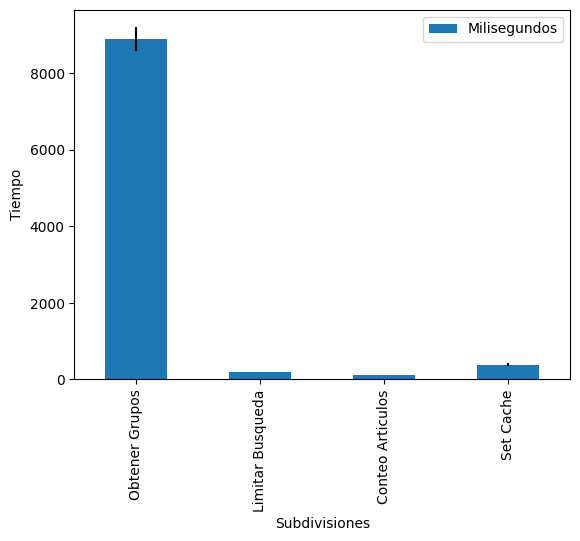

In [4]:
grupos = df.groupby("GRUPO").mean()

gruposFiltrados = grupos[grupos["TIME"] > 100]

print(gruposFiltrados)
print(df[df["TIME"] > 100].groupby("GRUPO").std())

ax = gruposFiltrados.plot(kind="bar", yerr=df[df["TIME"] > 100].groupby("GRUPO").std(), ylabel="Tiempo", xlabel="Subdivisiones")

ax.set_xticklabels(["Obtener Grupos", 
                    "Limitar Busqueda",
                    "Conteo Articulos",
                    "Set Cache",
                    ])

ax.legend(["Milisegundos"])

                                 TIME
GRUPO                                
limitar_busqueda_grupos_time  192.968
not_articulos_count_time      105.895
seteo_cache_time              382.409
                                    TIME
GRUPO                                   
len_grupos_time               309.407225
limitar_busqueda_grupos_time    5.302992
not_articulos_count_time        2.922038
seteo_cache_time               43.760860


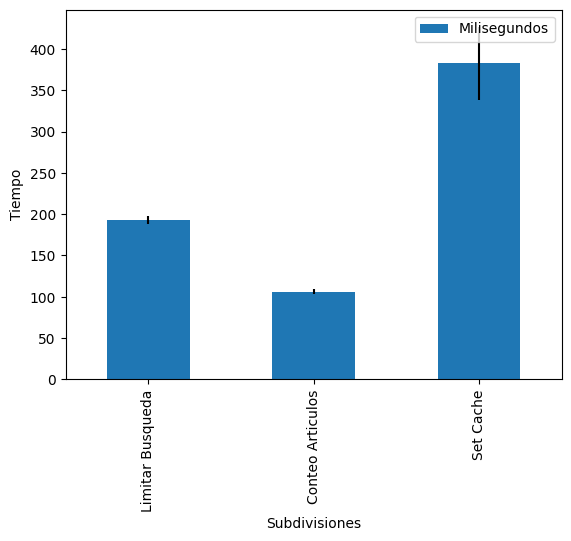

In [7]:
grupos = df.groupby("GRUPO").mean()

gruposFiltrados = grupos[(grupos["TIME"] > 100) & (grupos["TIME"] < 4000)]

print(gruposFiltrados)
print(df[df["TIME"] > 100].groupby("GRUPO").std())

ax = gruposFiltrados.plot(kind="bar", yerr=df[df["TIME"] > 100].groupby("GRUPO").std(), ylabel="Tiempo", xlabel="Subdivisiones")

ax.set_xticklabels([ 
                    "Limitar Busqueda",
                    "Conteo Articulos",
                    "Set Cache",
                    ])

ax.legend(["Milisegundos"])